# Crude oil price prediction using LSTM

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
dataset=pd.read_csv('Dataset/Crude Oil Prices Daily_Train.csv')

Using TensorFlow backend.


## Preparing data

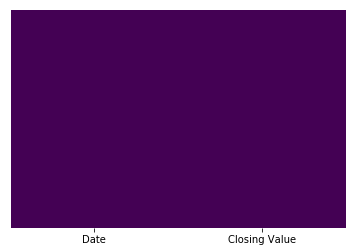

In [2]:
## Checking for any missing value
sns.heatmap(dataset.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [3]:
## Splitting the dataset into train and test
training = dataset[:6400]
testing =dataset[6400:]

In [4]:
training.head()

,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87


In [5]:
## Deleting all the null value
training=training.dropna()

In [6]:
# Create an array out of dataframe's column Crude oil prices
train_data=training.iloc[:,1:2].values
training.head()

,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87


In [7]:
## Features Extraction

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_data=scaler.fit_transform(train_data)

In [8]:
## Selecting 90 as the time steps

X_train=[]
y_train=[]
for i in range(90,len(scaled_train_data)):
    X_train.append(scaled_train_data[i-90:i,0])
    y_train.append(scaled_train_data[i,0])

## Converting the data to the numpy array as it is expected by our RNN model
X_train=np.array(X_train)
y_train=np.array(y_train)    

## Reshaping 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

## Model

In [9]:
## Builiding the model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
## Intialising the model
model=Sequential()

## First layer
model.add(LSTM(units=40,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
## Second layer
model.add(LSTM(units=40,return_sequences=True))
model.add(Dropout(0.2))
## Third layer
model.add(LSTM(units=40,return_sequences=True))
model.add(Dropout(0.2))
## Fourth Layer
model.add(LSTM(units=40,return_sequences=False))
model.add(Dropout(0.2))
## Output Layer
model.add(Dense(1))

In [11]:
## Compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
## Fitting the model on our dataset
model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
6310/6310 [==============================] - 45s 7ms/step - loss: 0.0043
Epoch 2/5
6310/6310 [==============================] - 43s 7ms/step - loss: 0.0013
Epoch 3/5
6310/6310 [==============================] - 43s 7ms/step - loss: 0.0012
Epoch 4/5
6310/6310 [==============================] - 44s 7ms/step - loss: 0.0011
Epoch 5/5
6310/6310 [==============================] - 44s 7ms/step - loss: 0.0011


## Save the model

In [ ]:
# model.save('lstm_model.h5')

## Load the model

In [18]:
model_loaded = load_model('lstm_model.h5')

In [19]:
model_loaded.compile(loss="mse", optimizer="adam")

## Making predictions

In [13]:
## Making the final dataset for making predictions 

#testing=pd.read_csv('Dataset/Crude Oil Prices Daily_Test.csv')
testing=testing.dropna()
test_data=testing.iloc[:,1:2].values

final_dataset=pd.concat((training['Closing Value'],testing['Closing Value']),axis=0)
input_Data=final_dataset[len(final_dataset)-len(test_data)-90:].values
input_Data=input_Data.reshape(-1,1)
input_Data=scaler.transform(input_Data)

## Getting the stock price of previous 90 days
X_test=[]
for i in range(90,len(testing)+90):
    X_test.append(input_Data[i-90:i,0])
X_test=np.array(X_test)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [20]:
#Making prediction
predictions=model_loaded.predict(X_test)
predictions=scaler.inverse_transform(predictions)

## Visualizations

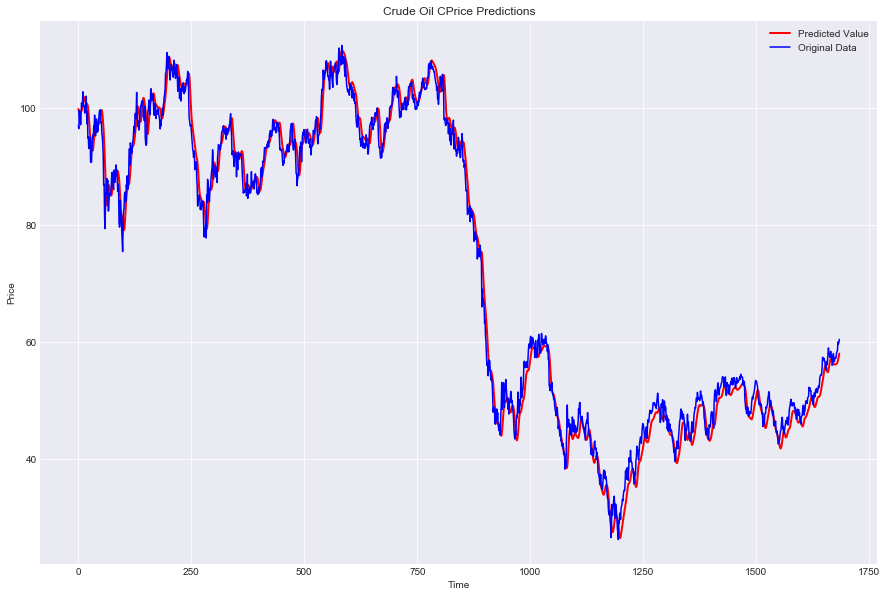

<Figure size 432x288 with 0 Axes>

In [21]:
## Visualising the predictions and original data
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
fig = plt.figure(figsize=(15,10))
plt.plot(predictions,color='red',label='Predicted Value', linewidth=2)
plt.plot(test_data,color='blue',label='Original Data')
plt.title('Crude Oil CPrice Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
plt.savefig('fig_1.png')

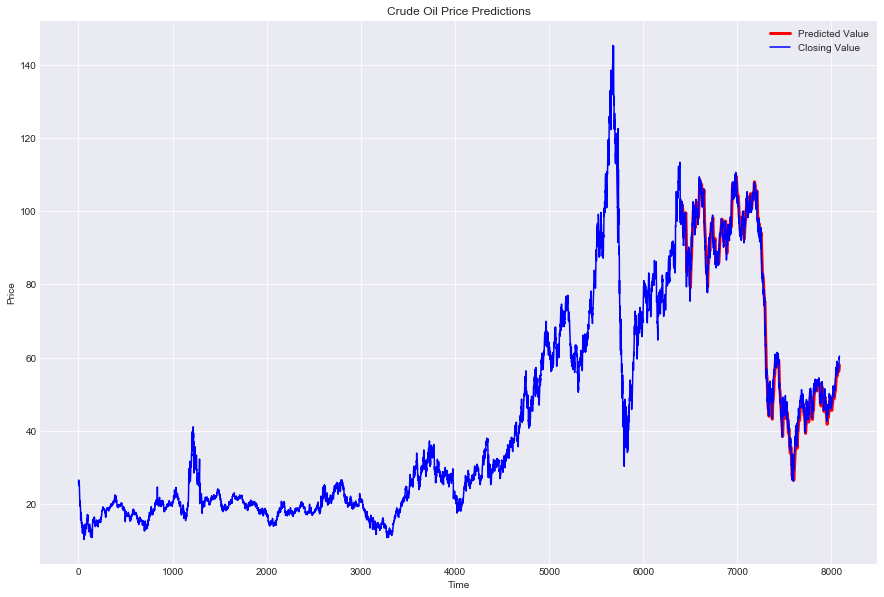

In [22]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
fig = plt.figure(figsize=(15,10))
plt.plot(list(range(len(final_dataset) - len(test_data), len(final_dataset))), predictions,color='red',label='Predicted Value', linewidth=3)
#plt.plot(list(range(len(final_dataset) - len(test_data), len(final_dataset))),test_data,color='blue',label='Original Data')
plt.plot(list(range(len(final_dataset))), final_dataset, color = 'blue')
plt.title('Crude Oil Price Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()